# Emerging Technologies Project

The following notebook trains a model that can be used to predict power output from wind speed values, as defined in the `powerproduction` dataset.

## Preamble

I'll begin by importing the necessary packages and reading in the dataset.

In [1]:
import tensorflow.keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot style
plt.style.use("ggplot")

# Plot size
plt.rcParams["figure.figsize"] = [14, 8]

In [3]:
# Read in the dataset
df = pd.read_csv("./powerproduction.csv")

# Print the first few rows
df.head(8)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826


Next I'll partition the dataset it into two subsets. The first will be used to fit the model and is referred to as the training dataset, while the second will instead be used to make predictions based on the training data. The objective of splitting the data is to provide a way to estimate the performance of the machine learning model when it is presented with new data, i.e. data that wasn't used to train the model [1].

The training set will make up 80% of the total items in the overall dataset.

In [4]:
# Create train and test sets
# Reference: TensorFlow documentation
# https://www.tensorflow.org/tutorials/keras/regression#split_the_data_into_train_and_test
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

print("Training:")
print(train.head())
print("\nTesting:")
print(test.head())

Training:
      speed    power
90    4.905    7.060
254  12.713   51.149
283  14.489   71.763
445  22.422   99.357
461  23.273  113.556

Testing:
    speed  power
9   0.526  5.553
25  1.051  2.085
28  1.151  1.208
31  1.301  0.000
32  1.401  4.156


In order to better visualise the training and testing data sets we can plot them both using Matplotlib.

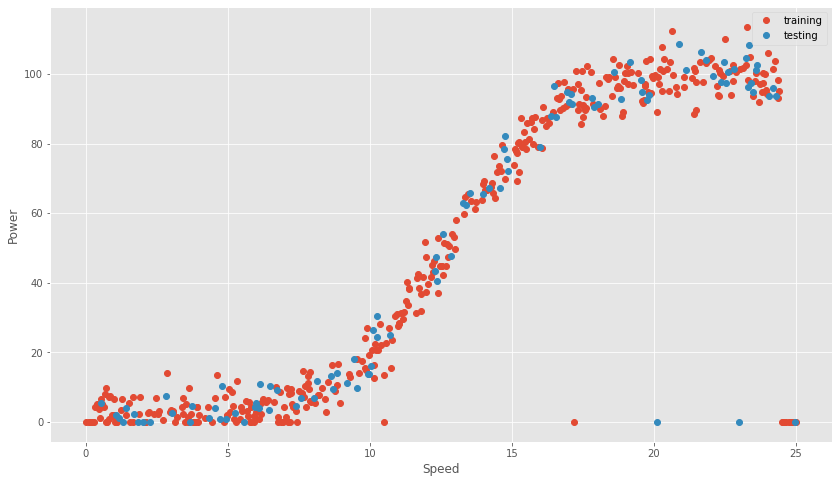

In [5]:
plt.plot(
    train.speed,
    train.power,
    "o",
    label="training"
)

plt.plot(
    test.speed, 
    test.power,
    "o",
    label="testing"
)

plt.xlabel("Speed")
plt.ylabel("Power")

plt.legend();

## Creating a Linear Model

Now I'll construct a linear modal and attempt to use it in order to make predictions. This is done below using Keras' `Sequential` class, which represents a linear grouping of layers [2]. The model created below contains a single dense layer. A dense layer is a layer in neural network that’s fully connected, meaning all the neurons in one layer are connected to all other neurons in the next layer [2].

In [6]:
model = kr.models.Sequential()

# Add a single dense layer
model.add(
    kr.layers.Dense(
        1,
        input_shape=(1,),
        activation="linear",
        kernel_initializer="ones",
        bias_initializer="zeros"
    )
)

# Compile the model
model.compile("adam", loss="mean_squared_error")

In [7]:
# Train the neural network on the training data
model.fit(
    train.speed,
    train.power,
    epochs=200,
    batch_size=10
)

Epoch 1/200
40/40 [==============================] - 4s 2ms/step - loss: 2596.7108
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 2537.2960
Epoch 3/200
40/40 [==============================] - 0s 567us/step - loss: 2454.4845
Epoch 4/200
40/40 [==============================] - 0s 800us/step - loss: 2325.9834
Epoch 5/200
40/40 [==============================] - 0s 448us/step - loss: 2379.5247
Epoch 6/200
40/40 [==============================] - 0s 401us/step - loss: 2271.6104
Epoch 7/200
40/40 [==============================] - 0s 401us/step - loss: 2108.5016
Epoch 8/200
40/40 [==============================] - 0s 465us/step - loss: 2201.5125
Epoch 9/200
40/40 [==============================] - 0s 401us/step - loss: 2025.3109
Epoch 10/200
40/40 [==============================] - 0s 801us/step - loss: 2161.5099
Epoch 11/200
40/40 [==============================] - 0s 401us/step - loss: 2119.5963
Epoch 12/200
40/40 [==============================] - 0s 568us/step

40/40 [==============================] - 0s 482us/step - loss: 585.0378
Epoch 97/200
40/40 [==============================] - 0s 401us/step - loss: 563.9653
Epoch 98/200
40/40 [==============================] - 0s 401us/step - loss: 606.8264
Epoch 99/200
40/40 [==============================] - 0s 401us/step - loss: 662.4926
Epoch 100/200
40/40 [==============================] - 0s 503us/step - loss: 554.9753
Epoch 101/200
40/40 [==============================] - 0s 802us/step - loss: 648.0030
Epoch 102/200
40/40 [==============================] - 0s 401us/step - loss: 595.6930
Epoch 103/200
40/40 [==============================] - 0s 400us/step - loss: 694.9377
Epoch 104/200
40/40 [==============================] - 0s 401us/step - loss: 558.2356
Epoch 105/200
40/40 [==============================] - 0s 402us/step - loss: 514.8046
Epoch 106/200
40/40 [==============================] - 0s 400us/step - loss: 510.4004
Epoch 107/200
40/40 [==============================] - 0s 401us/step - 

40/40 [==============================] - 0s 401us/step - loss: 495.8555
Epoch 192/200
40/40 [==============================] - 0s 401us/step - loss: 533.7213
Epoch 193/200
40/40 [==============================] - 0s 401us/step - loss: 594.3788
Epoch 194/200
40/40 [==============================] - 0s 594us/step - loss: 597.5630
Epoch 195/200
40/40 [==============================] - 0s 401us/step - loss: 692.1482
Epoch 196/200
40/40 [==============================] - 0s 401us/step - loss: 600.7415
Epoch 197/200
40/40 [==============================] - 0s 401us/step - loss: 594.3759
Epoch 198/200
40/40 [==============================] - 0s 401us/step - loss: 463.2239
Epoch 199/200
40/40 [==============================] - 0s 568us/step - loss: 572.7508
Epoch 200/200
40/40 [==============================] - 0s 401us/step - loss: 581.5239


### Analysis

Now that the training process is complete, the model can be used to make predictions. First I'll visualise the results by plotting the values from the `train` dataset alongside the predicted values of each point in the `test` dataset. I'll create a function for this since I'm going to be reusing a lot of the below code throughout the notebook.

In [8]:
def plot_predictions(pred_speed=None, pred_power=None):
    """
    Creates a plot of the training dataset alongside the predicted values of each point
    in the test dataset.
    
    :param float pred_speed: Can be used to plot a specific predicted speed value.
    :param float pred_power: Can be used to plot a specific predicted power value.
    """
    # Plot the training dataset
    plt.plot(
        train.speed,
        train.power,
        "o",
        label="actual"
    )

    # Plot the predictions from the `test` dataset
    plt.plot(
        test.speed, 
        model.predict(test.speed),
        label="predictions"
    )
    
    if pred_speed is not None and pred_power is not None:
        # Show the prediction location on the plot
        # Ref: https://www.mathworks.com/matlabcentral/answers/430336-draw-lines-from-both-axis-to-point-in-plot
        plt.plot(pred_speed, pred_power, "ko")
        plt.plot([pred_speed, pred_speed], [0, pred_power], "k-")
        plt.plot([0, pred_speed], [pred_power, pred_power], "k-")

    plt.xlabel("Speed")
    plt.ylabel("Power")

    plt.legend();

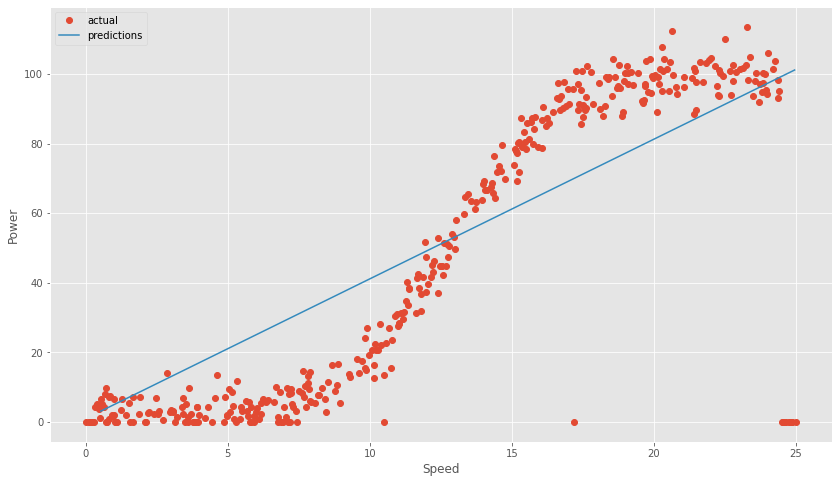

In [9]:
plot_predictions()

We can also predict individual values using Keras' `model.predict()` function. Below I find the predicted power output if the speed is 20, and then show where the result appears on the plot.

In [10]:
# Take a hand-picked speed value and view its predicted power
pred_speed = 20.0
pred_power = model.predict([pred_speed])[0]

pred_power

array([81.25398], dtype=float32)

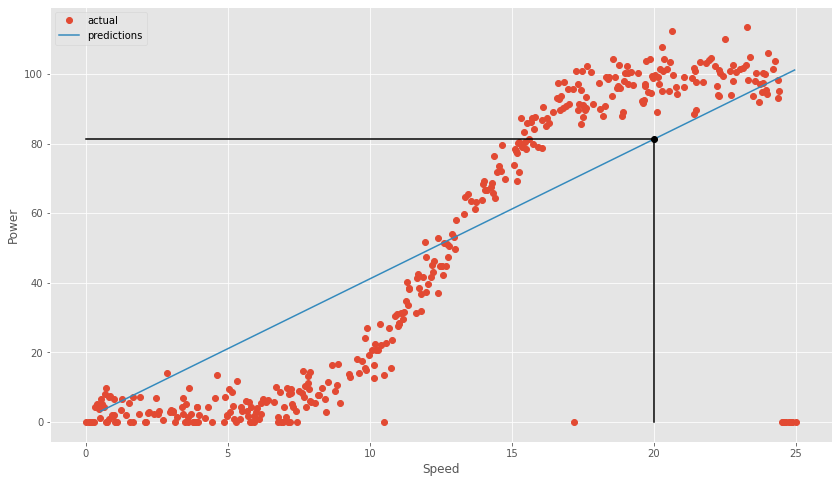

In [11]:
plot_predictions(pred_speed, pred_power)

As illustrated above, if we attempt to predict the power when the wind speed is 20, we get a value that is much lower than what we would expect. This is because the data in our dataset is not quite linear, and therefore linear regression is not the best form of regression to perform if we want to make more accurate predictions.

## Non-Linear Regression

Linear regression assumes that the relationship between an independent variable $x$ and a dependent variable $y$ can be best expressed with a line [3]. However, because the `powerproduction` dataset is non-linear, it would make more sense to do polynomial regression. Polynomial regression expresses the relationship between two variables as a polynomial curve [3].

Below I'll rebuild the model, this time using the *sigmoid* activation function. An activation function is simply a mathematical function that takes in an input and produces an output [4]. The function is activated when the computed result reaches a specified threshold and the output is then passed onto the neurons on the subsequent layer [4]. The sigmoid activation function is "S" shaped and can add non-linearity to the output [4].

In [12]:
# Re-build the model
model = kr.models.Sequential()

model.add(
    kr.layers.Dense(
        64,
        input_shape=(1,),
        activation="sigmoid",
        kernel_initializer="glorot_uniform",
        bias_initializer="glorot_uniform"
    )
)

model.add(kr.layers.Dense(1, activation="linear"))

model.compile(kr.optimizers.Adam(lr=0.001), loss="mean_squared_error")

In [13]:
# Fit the data
model.fit(
    train.speed,
    train.power,
    epochs=300,
    batch_size=10
)

Epoch 1/300
40/40 [==============================] - 0s 2ms/step - loss: 3797.6142
Epoch 2/300
40/40 [==============================] - 0s 401us/step - loss: 3573.9493
Epoch 3/300
40/40 [==============================] - 0s 568us/step - loss: 3476.5516
Epoch 4/300
40/40 [==============================] - 0s 802us/step - loss: 3086.8467
Epoch 5/300
40/40 [==============================] - 0s 401us/step - loss: 3112.6846
Epoch 6/300
40/40 [==============================] - 0s 801us/step - loss: 2737.4095
Epoch 7/300
40/40 [==============================] - 0s 568us/step - loss: 2734.6325
Epoch 8/300
40/40 [==============================] - 0s 401us/step - loss: 2412.3235
Epoch 9/300
40/40 [==============================] - 0s 801us/step - loss: 2165.6985
Epoch 10/300
40/40 [==============================] - 0s 401us/step - loss: 2216.0078
Epoch 11/300
40/40 [==============================] - 0s 943us/step - loss: 2217.1849
Epoch 12/300
40/40 [==============================] - 0s 400us/st

40/40 [==============================] - 0s 568us/step - loss: 285.8413
Epoch 98/300
40/40 [==============================] - 0s 401us/step - loss: 387.1598
Epoch 99/300
40/40 [==============================] - 0s 401us/step - loss: 339.5405
Epoch 100/300
40/40 [==============================] - 0s 862us/step - loss: 248.9618
Epoch 101/300
40/40 [==============================] - 0s 487us/step - loss: 245.8278
Epoch 102/300
40/40 [==============================] - 0s 401us/step - loss: 298.9336
Epoch 103/300
40/40 [==============================] - 0s 401us/step - loss: 276.2504
Epoch 104/300
40/40 [==============================] - 0s 401us/step - loss: 386.8728
Epoch 105/300
40/40 [==============================] - 0s 401us/step - loss: 349.4786
Epoch 106/300
40/40 [==============================] - 0s 542us/step - loss: 330.4955
Epoch 107/300
40/40 [==============================] - 0s 401us/step - loss: 291.2727
Epoch 108/300
40/40 [==============================] - 0s 401us/step -

40/40 [==============================] - 0s 568us/step - loss: 288.3335
Epoch 193/300
40/40 [==============================] - 0s 401us/step - loss: 205.2893
Epoch 194/300
40/40 [==============================] - 0s 801us/step - loss: 224.7326
Epoch 195/300
40/40 [==============================] - 0s 401us/step - loss: 271.2582
Epoch 196/300
40/40 [==============================] - 0s 801us/step - loss: 400.5640
Epoch 197/300
40/40 [==============================] - 0s 568us/step - loss: 314.7392
Epoch 198/300
40/40 [==============================] - 0s 401us/step - loss: 193.8581
Epoch 199/300
40/40 [==============================] - 0s 801us/step - loss: 240.3275
Epoch 200/300
40/40 [==============================] - 0s 401us/step - loss: 185.3947
Epoch 201/300
40/40 [==============================] - 0s 567us/step - loss: 294.8181
Epoch 202/300
40/40 [==============================] - 0s 802us/step - loss: 257.9245
Epoch 203/300
40/40 [==============================] - 0s 401us/step

40/40 [==============================] - 0s 401us/step - loss: 168.1107
Epoch 288/300
40/40 [==============================] - 0s 401us/step - loss: 325.5804
Epoch 289/300
40/40 [==============================] - 0s 568us/step - loss: 226.3592
Epoch 290/300
40/40 [==============================] - 0s 401us/step - loss: 197.4971
Epoch 291/300
40/40 [==============================] - 0s 401us/step - loss: 205.8470
Epoch 292/300
40/40 [==============================] - 0s 838us/step - loss: 181.8397
Epoch 293/300
40/40 [==============================] - 0s 444us/step - loss: 266.4846
Epoch 294/300
40/40 [==============================] - 0s 401us/step - loss: 300.8832
Epoch 295/300
40/40 [==============================] - 0s 401us/step - loss: 332.6948
Epoch 296/300
40/40 [==============================] - 0s 401us/step - loss: 184.5675
Epoch 297/300
40/40 [==============================] - 0s 401us/step - loss: 208.3783
Epoch 298/300
40/40 [==============================] - 0s 568us/step

### Analysis

Once again, we can use this newly created model to make predictions. As done previously, I'll plot the values of the `train` dataset along with the predicted values of each point in the `test` dataset. Doing so, we'll find the predicted values appear to form a curved line.

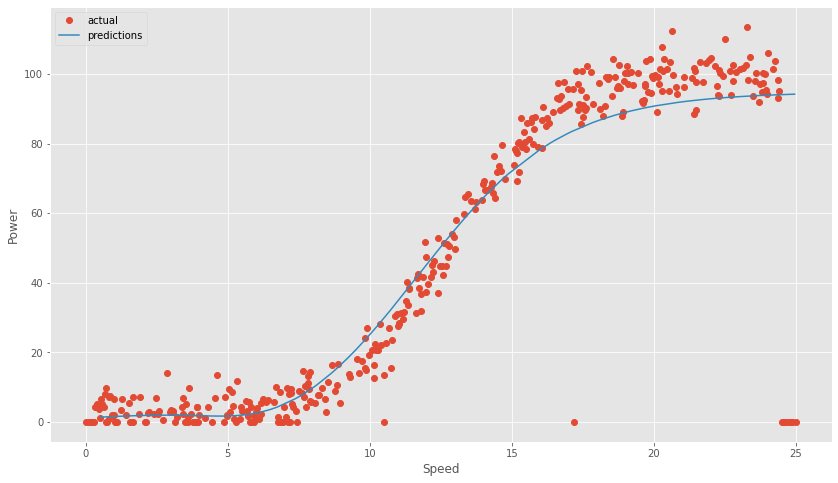

In [14]:
plot_predictions()

Again, we can provide an input speed of 20 to Keras' `model.predict()` function and plot the result.

In [15]:
pred_power = model.predict([pred_speed])[0]

pred_power

array([90.738144], dtype=float32)

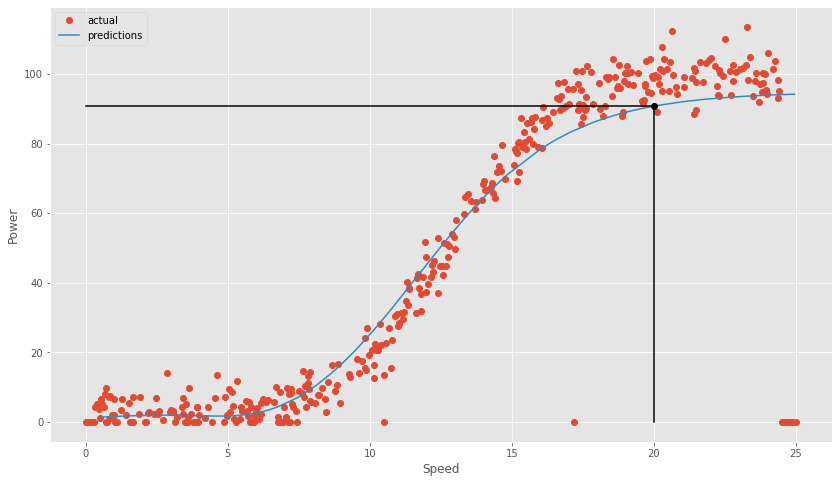

In [16]:
plot_predictions(pred_speed, pred_power)

We see that the result when using non-linear regression is much more accurate compared to the linear model tested previously.

## Saving the Model

We can use `model.save()` to easily save the model for later use in the web application.

In [17]:
model.save("power_prod.h5")

## References

1. [Train-Test Split for Evaluating Machine Learning Algorithms](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/). Jason Brownlee. Machine Learning Mastery.
2. [Linear Regression using Keras and Python](https://heartbeat.fritz.ai/linear-regression-using-keras-and-python-7cee2819a60c). Dhiraj K. Heartbeat.
3. [Polynomial Regression using tf.keras](https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256). Ananya Gangavarapu. Medium.
4. [Neural Network Activation Function Types](https://medium.com/fintechexplained/neural-network-activation-function-types-a85963035196). Farhad Malik. Medium.